# Cycle Detection example

## Libraries needed

In [1]:
import time
import networkx as nx
import BProp
import Bernstein
import TSVParse as tsv
from tqdm import tqdm
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
matplotlib.use("nbagg")

## Generating a random graph
### N is the number of nodes and M is the number of edges

In [2]:
M = 50
N = 5
edges = []
for i in range(M):
    s = random.randrange(N)
    t = random.randrange(N)
    edges.append((s + 1,t + 1))

## Importing a graph

In [ ]:
edges = tsv.decode_konect_tsv("graphs/sheep.tsv")
#edges = tsv.decode_konect_tsv("graphs/cattle.tsv")
#edges = tsv.decode_konect_tsv("graphs/rhesus.tsv")
#edges = tsv.decode_konect_tsv("graphs/us airports.tsv")
#edges = tsv.decode_konect_tsv("graphs/little rock lake.tsv")
#edges = tsv.decode_konect_tsv("graphs/macaques.tsv")
#edges = tsv.decode_konect_tsv("graphs/dutch college.tsv")
#edges = tsv.decode_konect_tsv("graphs/hens.tsv")
#edges = tsv.decode_konect_tsv("graphs/sampson.tsv")
#edges = tsv.decode_konect_tsv("graphs/seventh graders.tsv")
#edges = tsv.decode_konect_tsv("graphs/florida dry.tsv")
#edges = tsv.decode_konect_tsv("graphs/florida wet.tsv")
#edges = tsv.decode_konect_tsv("graphs/bison.tsv")
#edges = tsv.decode_konect_tsv("graphs/blogs.tsv")
#edges = tsv.decode_konect_tsv("graphs/high school.tsv")
#edges = tsv.decode_konect_tsv("graphs/manufacturing emails.tsv")
#edges = tsv.decode_konect_tsv("graphs/physicians.tsv")
#edges = tsv.decode_konect_tsv("graphs/residence hall.tsv")
#edges = tsv.decode_konect_tsv("graphs/adolescent health.tsv")
#edges = tsv.decode_konect_tsv("graphs/open flights.tsv")
print(edges[0])
N = edges[0][0]
M = edges[0][1]
del(edges[0])

## BProp

In [3]:
G = BProp.BPGraph()
num = G.add_n_nodes(N)
cycles_G = 0
pbar = tqdm(total = len(edges))
start = time.time()

for u, v in edges:
    if not G.add_edge(u, v, decrement = True): # use decrement = False if using nodes starting from 0 instead of 1
        cycles_G = cycles_G + 1
        #break # uncomment if you want to stop when you detect an edge that forms a cycle
    pbar.update(1)
end = time.time()
pbar.close()
print("Time:", float(end - start), "s \nCycles:", cycles_G, "\n")

100%|██████████| 50/50 [00:00<00:00, 42939.23it/s]

Time: 0.0005600452423095703 s 
Cycles: 26 



## Bernstein and Chechik's algorithm

In [4]:
B = Bernstein.Bernstein()
B.add_n_nodes(N)
cycles = 0
pbar = tqdm(total = len(edges))
start = time.time()

for u, v in edges:
    if v - 1 not in B.neighbors(u - 1):
        if not B.add_edge(u - 1, v - 1):
            cycles = cycles + 1
            #break # uncomment if you want to stop when you detect an edge that forms a cycle
    pbar.update(1)
end = time.time()
pbar.close()
print("Time:", float(end - start), "s \nCycles:", cycles, "\n")

100%|██████████| 50/50 [00:00<00:00, 8739.59it/s]

Time: 0.00476384162902832 s 
Cycles: 26 



## DFS

In [5]:
D = BProp.BPGraph()
num = D.add_n_nodes(N)
pbar = tqdm(total = len(edges))
cycles_dfs = 0
start = time.time()

for u, v in edges:
    if v - 1 not in list(D[u - 1]):
        if not D.add_dfs_edge(u - 1, v - 1):
            cycles_dfs = cycles_dfs + 1
            #break # uncomment if you want to stop when you detect an edge that forms a cycle
    pbar.update(1)
end = time.time()
pbar.close()
print("\nTime:", float(end - start), "s \nCycles:", cycles_dfs, "\n")

100%|██████████| 50/50 [00:00<00:00, 32534.16it/s]


Time: 0.0010209083557128906 s 
Cycles: 26 



## BFS

In [6]:
b = BProp.BPGraph()
num = b.add_n_nodes(N)
pbar = tqdm(total = len(edges))
cycles_bfs = 0
start = time.time()

for u, v in edges:
    if v - 1 not in list(b[u - 1]):
        if not b.add_dfs_edge(u - 1, v - 1):
            cycles_bfs = cycles_bfs + 1
            #break # uncomment if you want to stop when you detect an edge that forms a cycle
    pbar.update(1)
end = time.time()
pbar.close()
print("\nTime:", float(end - start), "s \nCycles:", cycles_bfs, "\n")

100%|██████████| 50/50 [00:00<00:00, 32943.01it/s]


Time: 0.0009529590606689453 s 
Cycles: 26 



## Printing a graph

<IPython.core.display.Javascript object>


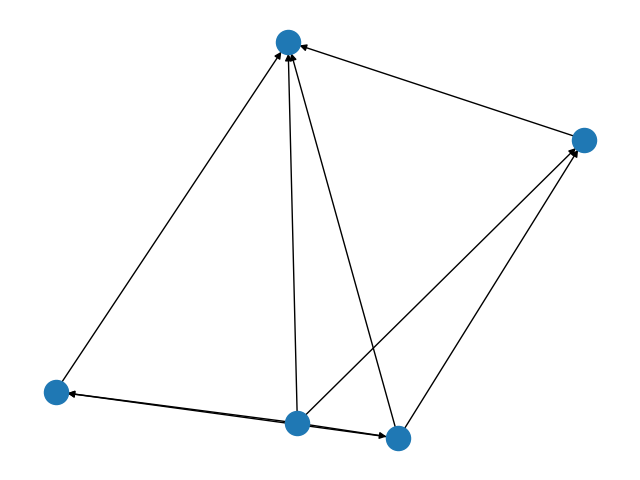

In [7]:
nx.draw(G)

## Printing a graph while inserting edges

<IPython.core.display.Javascript object>


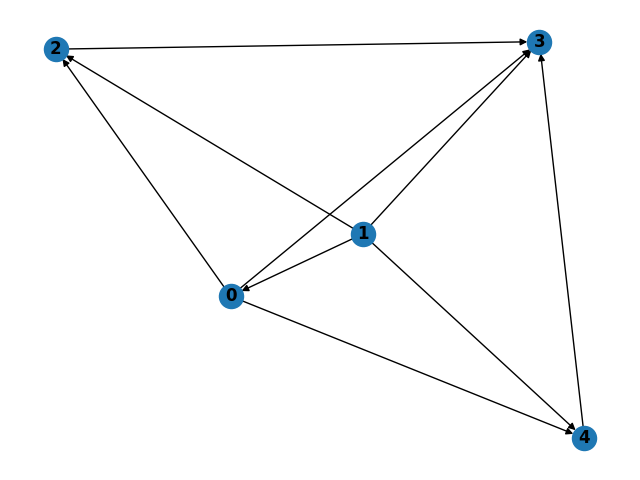

Time: 0.009340047836303711 s


In [8]:
G = BProp.BPGraph()
num = G.add_n_nodes(N)
start = time.time()

fig = plt.figure()
plt.ion()

def init():
    nx.draw(G, with_labels=True, font_weight='bold')

def update(edge):
    if G.add_edge(edge[0], edge[1], decrement = True):
        plt.cla()
        nx.draw(G, with_labels=True, font_weight='bold')

ani = FuncAnimation(fig, update, frames = edges, interval = 100., init_func = init, repeat = False)       

end = time.time()
print("Time:", float(end - start), "s")